In [1]:
from tdmclient import ClientAsync

from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 6ca1ca45-4524-41eb-8cc4-fb023f64b9d0

In [2]:
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [ ]:
#create vision module object
visio = Vision()
visio.begin(show_which=[1,1,1,1])

Caméra initialisée sur le port 0


Detected markers: [3 4 0 2 5 1]
Detected 6 markers : [3, 4, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [3 4 0 2 5 1]
Detected 6 markers : [3, 4, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [3 4 0 2 5 1]
Detected 6 markers : [3, 4, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
(find_marker_center_and_orientation) Division by 0 : returning tr instead of center
Detected markers: [3 4 0 2 5 1]
Detected 6 markers : [3, 4, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 

In [4]:
visio.stop() #stop the visio module

In [ ]:
t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need

In [ ]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)


# # Get the initial value of our thymio，goal and obstacles
# thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles()
# thymio_x, thymio_y, theta = thymio
# start = (thymio_x, thymio_y)
# # Get the desired goal list from the vision module
# goal_list = global_navigation.dijkstra(start, goal, obstacles)
# # Delete the start point
# goal_list.pop(0)
# goal_point = goal_list[0]
# 
# try:
#     while True:
#         # Vous pouvez exécuter d'autres tâches en parallèle ici
#         # Le programme principal continue de tourner sans bloquer l'affichage
#         motion_control.obstacle_avoidance()
#         if motion_control.path_tracking(thymio, goal_point):
#             if goal_list:
#                 goal_list.pop(0)
#                 goal_point = goal_list[0]
#             else:
#                 break
#         thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles() 
#         print("Le programme principal fonctionne en arrière-plan...")
#         time.sleep(1)
# except KeyboardInterrupt:
#     print("Arrêt du programme demandé.")
# finally:
#     camera_thread.stop()
#     camera_thread.join()
#     print("Programme terminé.")

Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [3 4 0 2 5 1]
Detected 6 markers : [3, 4, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Detected markers: [4 5]
Detected markers: [4 3 0 2 5 1]
Detected 6 markers : [4, 3, 0, 2, 5, 1]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
Dete

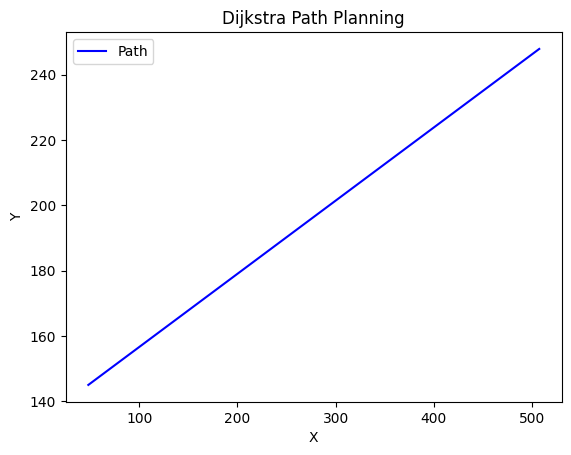

In [9]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [10]:
print(path)

[(48.0, 145.0), (507.58698, 247.84119)]


In [11]:
path.pop(0)
goal_point = path[0]
print(goal_point)

try:
    while True:
        motion_control.obstacle_avoidance()
        if motion_control.path_tracking(thymio, goal_point):
            if path:
                path.pop(0)
                goal_point = path[0]
            else:
                break
        thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        time.sleep(1)
except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program finishes")

(507.58698, 247.84119)
Stop the program
Program finishes


In [ ]:
motion_control.set_motor_speed(0, 0)
#test